<a href="https://colab.research.google.com/github/kirisame-ame/GCI_AI-Course/blob/main/ENG_hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3: Visualizing Data Using Matplotlib

## Question

Your task is to analyze a dataset containing transaction history of UK-based and registered non-store online retail store [1].
Please execute the following tasks based on the purchase data. Follow the preprocessing steps as described below. When submitting, your code should include only the sections from steps 2 to 6.

Both the [dataset itself](https://archive.ics.uci.edu/static/public/352/online+retail.zip) and its [description](https://archive.ics.uci.edu/dataset/352/online+retail) are available online.

Using the downloaded and preprocessed (see section 2) data, `target_online_retail_data_tb`, write a function that processes and returns the following:

1. **Calculate Total Purchase Amount per Customer:**
    - Compute the total purchase amount for each customer (`CustomerID`) by summing the `TotalPrice` values.

2. **Sort Customers in Descending Order:**
    - Sort the customers based on their total purchase amounts in descending order.

3. **Group Customers into $n$ Equal Parts:**
    - Without changing the sorted order, divide the customers into $n$ groups of equal size.
        - $n$ is a natural number (i.e., a positive integer) that does not exceed the number of data points that does not cause any splitting point to fall exactly on duplicate values.
        - If the number of data points is not perfectly divisible by $n$, use the behavior of `pd.qcut()` to handle the grouping.

4. **Calculate Revenue Proportion for Each Group:**
    - For each group, calculate the percentage of the overall revenue (total purchase amount) that the group represents.
        - This approach is known as decile analysis when $n$ equals 10, but the method applies generally for any valid $n$.

5. **Sort Groups by Sales Proportion in Descending Order:**
    - Sort the groups in descending order based on their sales proportions and label them as "Group 1", "Group 2", ..., "Group n". Return the result as a `pandas.Series`.

<br>

**Additional Background:**<br>
In marketing strategy, dividing customers into segments is called segmentation, and focusing on the top 20% of customers is known as **targeting**. Often, targeting premium customers leads to a higher return on investment. This concept is related to the **Pareto Principle**, which states that roughly 80% of the sales come from the top 20% of customers.

**Submission Guidelines:**<br>
When submitting your solution, only submit the entire `homework()` function. Submit by selecting this week's assignment in the Omnicampus homework section, pasting the function into the submission area, and then clicking [Submit Python Code].

Please pay attention to the following points when submitting.
- Erase the `!!WRITE ME!!` when submitting
- Do **NOT** change the preprocessing cell (see section 2)
- The return value of the function should be type `pandas.Series`
    - e.g. `my_result = pd.Series([0.6, 0.2, 0.1, 0.025, 0.025, 0.022, 0.021, 0.02, 0.01, 0])`
    - The sales proportions should be ordered by group, and the total should sum to 1.

## Deadline
2/11 (Tue) 23:59

## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2. Downloading the Dataset

In [3]:
# Download the data from the UCI website
!wget "http://archive.ics.uci.edu/static/public/352/online+retail.zip"
# Extract the downloaded data.
!unzip "./online+retail.zip"
# Load the extracted Excel data.
file_url = './Online Retail.xlsx'
online_retail_data = pd.ExcelFile(file_url)

--2025-03-07 13:21:54--  http://archive.ics.uci.edu/static/public/352/online+retail.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘online+retail.zip’

online+retail.zip       [     <=>            ]  22.62M  21.8MB/s    in 1.0s    

2025-03-07 13:21:55 (21.8 MB/s) - ‘online+retail.zip’ saved [23715478]

Archive:  ./online+retail.zip
 extracting: Online Retail.xlsx      


We will also conduct several preprocessing in advance.

**Note: Do not modify the following cell!!!**

In [4]:
# Specify a sheet in an Excel file
online_retail_data_table = online_retail_data.parse('Online Retail')

# Convert to string type for grading purposes
online_retail_data_table['cancel_flg'] = online_retail_data_table.InvoiceNo.map(lambda x: str(x)[0])

# Select rows where the first character of InvoiceNo is '5' and CustomerID is not null
target_online_retail_data_tb = online_retail_data_table[(online_retail_data_table.cancel_flg == '5')
                                                        & (online_retail_data_table.CustomerID.notnull())]

target_online_retail_data_tb = target_online_retail_data_tb.assign(TotalPrice=target_online_retail_data_tb.Quantity * target_online_retail_data_tb.UnitPrice)

## 3. Solution

In [5]:
target_online_retail_data_tb.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancel_flg,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,5,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,5,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,5,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,5,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,5,20.34


In [10]:
target_online_retail_data_tb["sum"] = target_online_retail_data_tb["TotalPrice"].groupby(target_online_retail_data_tb["CustomerID"]).transform("sum")
alias = target_online_retail_data_tb
alias.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,cancel_flg,TotalPrice,sum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,5,15.30,5391.21
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,5,20.34,5391.21
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,5,22.00,5391.21
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,5,20.34,5391.21
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,5,20.34,5391.21


In [36]:
simple = alias[["CustomerID","sum"]]
simple = simple.drop_duplicates().sort_values("sum",ascending=False)
simple.head()

,CustomerID,sum
37952,14646.0,280206.02
16425,18102.0,259657.30
14059,17450.0,194550.79
194354,16446.0,168472.50
1404,14911.0,143825.06


In [37]:
simple["Bins"] = pd.qcut(simple["sum"],10)
simple.head()

,CustomerID,sum,Bins
37952,14646.0,280206.02,"(3646.164, 280206.02]"
16425,18102.0,259657.30,"(3646.164, 280206.02]"
14059,17450.0,194550.79,"(3646.164, 280206.02]"
194354,16446.0,168472.50,"(3646.164, 280206.02]"
1404,14911.0,143825.06,"(3646.164, 280206.02]"


In [38]:
simple["Prop"] = simple["sum"].groupby(simple["Bins"],observed=True).transform("sum") / simple["sum"].sum()
simple.head()

,CustomerID,sum,Bins,Prop
37952,14646.0,280206.02,"(3646.164, 280206.02]",0.613751
16425,18102.0,259657.30,"(3646.164, 280206.02]",0.613751
14059,17450.0,194550.79,"(3646.164, 280206.02]",0.613751
194354,16446.0,168472.50,"(3646.164, 280206.02]",0.613751
1404,14911.0,143825.06,"(3646.164, 280206.02]",0.613751


In [43]:
cats = simple[["Bins","Prop"]].drop_duplicates()
cats["Prop"] = cats["Prop"].sort_values(ascending=False)
cats["Prop"].sum()

1.0

In [44]:
print(cats["Prop"])

37952     0.613751
113909    0.132421
307358    0.081592
116341    0.055334
433912    0.038579
94810     0.028380
155       0.020183
341237    0.014826
28307     0.009779
312864    0.005156
Name: Prop, dtype: float64


In [26]:
print(type(cats["Prop"]))

<class 'pandas.core.series.Series'>


In [45]:
# Fill in the WRITE ME
# Don't forget to erase the "!!WRITE ME!!" before submitting!
def homework(target_online_retail_data_tb, n):
  target_online_retail_data_tb["sum"] = target_online_retail_data_tb["TotalPrice"].groupby(target_online_retail_data_tb["CustomerID"]).transform("sum")
  alias = target_online_retail_data_tb
  simple = alias[["CustomerID","sum"]]
  simple = simple.drop_duplicates().sort_values("sum",ascending=False)
  simple["Bins"] = pd.qcut(simple["sum"],n)
  simple["Prop"] = simple["sum"].groupby(simple["Bins"],observed=True).transform("sum") / simple["sum"].sum()
  cats = simple[["Bins","Prop"]].drop_duplicates()
  cats["Prop"] = cats["Prop"].sort_values(ascending=False)
  return cats["Prop"]

Once you've finished checking, copy and paste your `homework()` function to Omnicampus and submit your solution. If you see a `1.0`, it means that the your answer was correct.

## 4. Visualizing the Result

Let's create a Pareto chart using the function we have created.

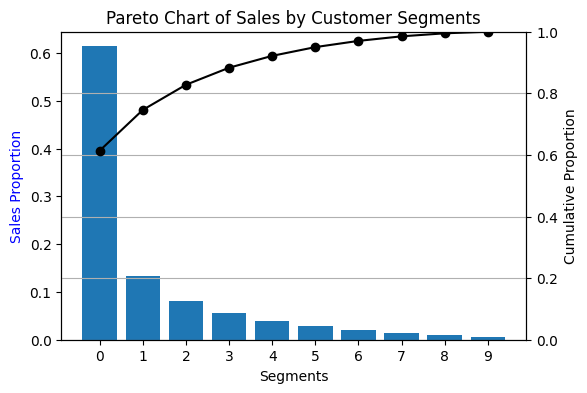

In [46]:
N = 10
data = homework(target_online_retail_data_tb, N)

fig, ax1 = plt.subplots(figsize=(6, 4))

# Determine the x-axis based on the number of segments
data_num = len(data)

# Cumulative sum
cum_per = np.cumsum(data)

# Bar chart
ax1.bar(range(data_num), data)
ax1.set_xticks(range(data_num))

# Line chart
ax2 = ax1.twinx()
ax2.plot(range(data_num), cum_per, color="k", marker="o")
ax2.set_ylim([0, 1])
ax2.grid(True, which='both', axis='y')

# Add labels and title for clarity
ax1.set_xlabel('Segments')
ax1.set_ylabel('Sales Proportion', color='b')
ax2.set_ylabel('Cumulative Proportion', color='k')
plt.title('Pareto Chart of Sales by Customer Segments')

# Show the plot
plt.show()

### References

[1] Chen D. Online Retail [dataset]. 2015. UCI Machine Learning Repository. Available from: https://doi.org/10.24432/C5BW33.